In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
%store -r demdata
%store -r repdata

### Data Cleaning
Remove URLs - Done
<br>Remove Duplicates - Done
<br>Add Word Count Feature - Done
<br>Analyze Word Count - Done
<br>Remove documents with word count below interquartile range - Done


In [3]:
#Removing the urls from title feature
#Reviewed code from a blog https://bobbyhadz.com/blog/python-remove-url-from-text
demdata['title'] = [re.sub(r'http\S+', '', title) for title in demdata['title']]

In [4]:
#Drop Duplicate Rows
demdata.drop_duplicates(inplace= True)

In [5]:
demdata['title_word_count']= demdata['title'].str.split(' ').apply(len)

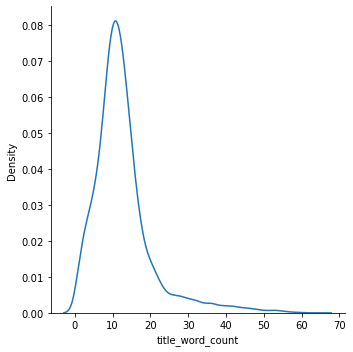

In [6]:
sns.displot(demdata['title_word_count'],kind = 'kde');

In [7]:
demdata['title_word_count'].describe()

count    9829.000000
mean       12.722861
std         8.069606
min         1.000000
25%         8.000000
50%        11.000000
75%        15.000000
max        64.000000
Name: title_word_count, dtype: float64

In [8]:
#Removing rows where title is less than 8 words because these posts don't have enough words to gather meaningful insight
demdata = demdata[demdata['title_word_count'] > 8]

In [9]:
dem_vec = CountVectorizer(stop_words = 'english')

X_dem= demdata['title']

X_dem= dem_vec.fit_transform(X_dem)

demdf = pd.DataFrame(X_dem.todense(), columns = dem_vec.get_feature_names_out())

In [10]:
#Top 50 Words in Democrat Subreddit
demdf.sum().sort_values(ascending = False).head(50)

trump          1203
biden           909
democrats       487
gop             464
house           437
republicans     395
says            379
court           378
president       367
abortion        333
new             331
republican      298
supreme         290
white           282
senate          277
election        232
texas           231
state           227
people          211
vote            194
rights          188
jan             186
joe             185
right           175
news            175
democratic      170
just            170
roe             159
ukraine         158
party           158
don             154
gun             148
russia          144
donald          139
judge           138
florida         136
voting          135
time            134
america         133
poll            133
say             132
governor        130
like            130
states          124
january         124
2022            121
federal         121
putin           119
year            117
americans       117


In [11]:
rep_vec = CountVectorizer(stop_words = 'english')

X_rep= repdata['title']

X_rep= rep_vec.fit_transform(X_rep)

repdf = pd.DataFrame(X_rep.todense(), columns = rep_vec.get_feature_names_out())

In [12]:
#Top 50 Words in Republican Subreddit
repdf.sum().sort_values(ascending = False).head(50)

biden          1597
trump          1020
new             449
democrats       373
says            363
joe             341
fbi             316
republicans     305
gop             300
republican      289
election        277
just            275
hunter          262
twitter         261
president       257
house           253
people          242
musk            231
desantis        228
video           226
inflation       218
poll            213
elon            208
america         206
court           200
abortion        197
white           196
news            192
like            186
american        180
amp             177
media           170
state           170
americans       164
don             161
florida         161
covid           158
democrat        157
left            151
gas             151
watch           151
school          147
gun             146
report          146
2024            137
texas           136
senate          134
right           133
police          133
vote            132


In [13]:
# Instantiate Sentiment Intensity Analyzer
sent = SentimentIntensityAnalyzer()

In [14]:
dem_sent= [sent.polarity_scores(post) for post in demdata['title']]

In [15]:
tempdf= pd.DataFrame.from_dict(dem_sent)

In [16]:
tempdf.head()

,neg,neu,pos,compound
0,0.471,0.529,0.000,-0.7906
1,0.140,0.764,0.096,-0.1779
2,0.000,0.913,0.087,0.3384
3,0.185,0.815,0.000,-0.3612
4,0.000,1.000,0.000,0.0000


In [17]:
demdata.shape

(7175, 5)

In [18]:
tempdf.shape

(7175, 4)

In [19]:
dem_sentdf = demdata.join(tempdf)

In [20]:
dem_sentdf.head()

,subreddit,title,selftext,author,title_word_count,neg,neu,pos,compound
0,democrats,biden-harris administration announces $156 mil...,,1000000students,11,0.471,0.529,0.0,-0.7906
0,democrats,dems need to revamp the party. biden is likely...,"Obama was kinda close, but there was no follow...",xxrowanleigh,39,0.471,0.529,0.0,-0.7906
0,democrats,should the msm and social media companies comp...,,ChrisSmith1969,29,0.471,0.529,0.0,-0.7906
0,democrats,trump says he's 'financially supporting' janua...,,ManchiBoy,22,0.471,0.529,0.0,-0.7906
0,democrats,men convicted of conspiring to kidnap gretchen...,,imll99,22,0.471,0.529,0.0,-0.7906


In [21]:
dem_sentdf['comp'] = tempdf['compound']

Next step is to analyze the sentiment scores for posts containing the top X topic area words.

Understand whether users feel positive, negative, or neutral about the top topic areas.

## EDA Next Steps

EDA)
1) Data Cleaning Remove Posts with less than 25% quartile
2) Remove Phone Numbers, Special Characters, Digits
3) Lowercase all the titles
4) Remove Duplicates
5) Explore the self text column. Do I have enough posts with self text to use this column instead? What value does the title have versus self text?

#Create a bar chart that better illustrates side by side the top 20 topics in dem and rep
1) Where is there overlap in topics?
2) What is the sentiment score look like where there is overlap?
3) Where is there variance between what republicans are talking about and dems are not, vice versa?
4) Sample some posts from the highest topics and strongest sentiment scores. How do people feel about these topics?
5) Pull some samples where predictions were inaccurate? Where and why is the model failing?

Model Improvements
1) Stacking Model
2) Analyze where model is struggling and see if we can remove certain features that are causing issues.


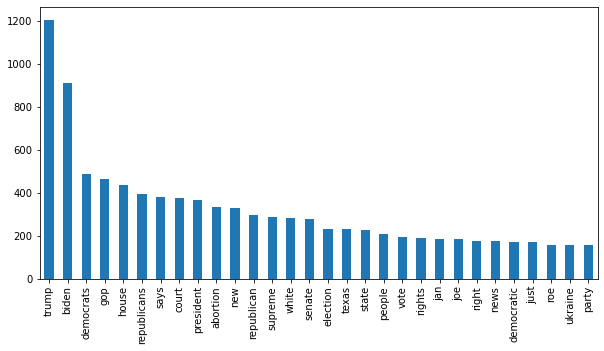

In [22]:
demdf.sum().sort_values(ascending=False).head(30).plot(kind='bar', figsize = (10,5));

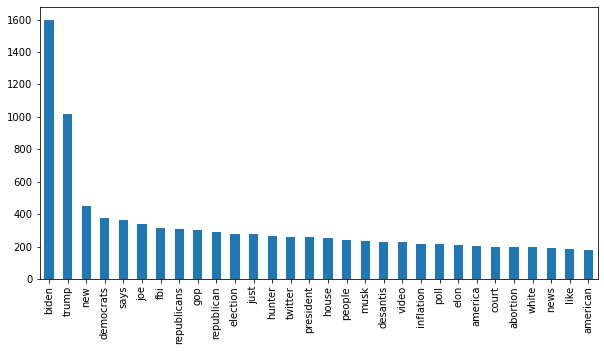

In [23]:
repdf.sum().sort_values(ascending=False).head(30).plot(kind='bar', figsize = (10,5));

In [24]:
demdata['selftext']= demdata['selftext'].astype(str)

C:\Users\dylan\AppData\Local\Temp\ipykernel_18468\1890738687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demdata['selftext']= demdata['selftext'].astype(str)


In [25]:
demdata['selftext_word_count'] = demdata['selftext'].str.split(' ').apply(len)

C:\Users\dylan\AppData\Local\Temp\ipykernel_18468\2279875627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demdata['selftext_word_count'] = demdata['selftext'].str.split(' ').apply(len)


In [26]:
#Democrat Subreddit does not typically include self text only 122 posts have self text
#As such I am choosing to just use the title for this analysis
demdata[demdata['selftext_word_count'] > 1]

,subreddit,title,selftext,author,title_word_count,selftext_word_count
1,democrats,hurricane ian’s toll is severe. lack of insura...,1. Vote for politicians who don’t believe in c...,TexasBogart,12,35
56,democrats,theory on how we ended up with the special mas...,Trump: We need to delay this as long as possib...,bluechip1996,15,57
107,democrats,john fetterman explains the meanings behind hi...,A true civil servant’s heart.,CQU617,28,5
135,democrats,a message for va’s 6th district: fire ben clin...,"In Roanoke, there’s so little chatter about th...",campbellscrambles,10,22
59,democrats,"i want to sign up as a democrat voter, but i'm...","My dad *ABSOLUTELY* hates democrats, but look ...",facelesscat04,21,199
...,...,...,...,...,...,...
60,democrats,florida’s new ‘don’t tread on me’ license plat...,"Visiting Florida this week, spending my hard e...",Spear-of-Stars,10,45
184,democrats,election deniers are running to control voting...,Vote for your choice. Keep these deniers out.,Purple_Syllabub_3417,15,8
45,democrats,my favorite line for today's hearing came from...,During Trump's Jan. 3rd meeting with DOJ offic...,backpackwayne,16,166
133,democrats,could i get a brief bullet point description o...,I keep a list of Joe Biden's accomplishment as...,backpackwayne,24,32


In [27]:
import re

def remove_url(titles):
    clean_title= []
    for text in demdata['title']:
        result = re.sub(r'http\S+', '', text)
        clean_title.append(result)
    return clean_title

In [28]:
def find_url(titles):
    apples_index = []
    for s in titles:
        if 'http' in s:
            apples_index.append(s)
    return apples_index

In [29]:
find_url(demdata['title'])

[]

In [30]:
#org 6
#net 2
#com 31